# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [23]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Kellie Thrower"
__contact__   = "kellie.thrower@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [87]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset
from metpy.units import units
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy import config

### OPEN NETCDF FILE ###

In [88]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:]#hours since 1900-01-01 00:00:0.0
tp = data.variables['tp'][:]*1000
p10u = data.variables['p10u'][:]
p10v = data.variables['p10v'][:]
msl = data.variables['msl'][:]/100

#fixing the time since 1900
dt = np.empty(len(time),dtype=datetime)
startTime = datetime(1900,1,1,0,0)
print(startTime)
for index, t in enumerate(time):
    dt[index] = startTime + timedelta(hours=int(t))
print(dt)

1900-01-01 00:00:00
[datetime.datetime(2002, 7, 1, 12, 0) datetime.datetime(2002, 7, 1, 18, 0)
 datetime.datetime(2002, 7, 2, 12, 0) datetime.datetime(2002, 7, 2, 18, 0)
 datetime.datetime(2002, 7, 3, 12, 0) datetime.datetime(2002, 7, 3, 18, 0)
 datetime.datetime(2002, 7, 4, 12, 0) datetime.datetime(2002, 7, 4, 18, 0)
 datetime.datetime(2002, 7, 5, 12, 0) datetime.datetime(2002, 7, 5, 18, 0)
 datetime.datetime(2002, 7, 6, 12, 0) datetime.datetime(2002, 7, 6, 18, 0)
 datetime.datetime(2002, 7, 7, 12, 0) datetime.datetime(2002, 7, 7, 18, 0)
 datetime.datetime(2002, 7, 8, 12, 0) datetime.datetime(2002, 7, 8, 18, 0)
 datetime.datetime(2002, 7, 9, 12, 0) datetime.datetime(2002, 7, 9, 18, 0)
 datetime.datetime(2002, 7, 10, 12, 0)
 datetime.datetime(2002, 7, 10, 18, 0)
 datetime.datetime(2002, 7, 11, 12, 0)
 datetime.datetime(2002, 7, 11, 18, 0)
 datetime.datetime(2002, 7, 12, 12, 0)
 datetime.datetime(2002, 7, 12, 18, 0)
 datetime.datetime(2002, 7, 13, 12, 0)
 datetime.datetime(2002, 7, 13, 

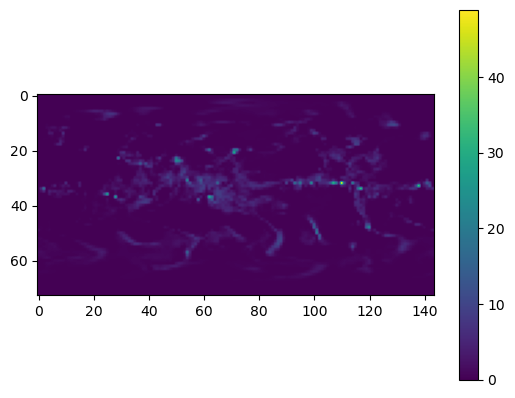

In [89]:
plt.imshow(tp[7])
plt.colorbar()

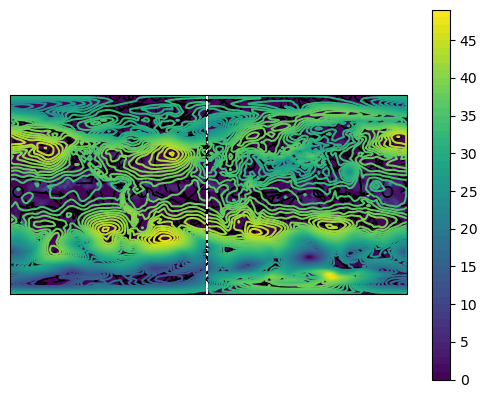

In [104]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contour(lon, lat, msl[2], 60, transform=ccrs.PlateCarree())
plt.contourf(lon, lat, tp[3], 60, transform=ccrs.PlateCarree())
plt.colorbar()
plt.barbs(lon[::5],lat[::5],p10u[0,::5,::5],p10v[0,::5,::5])
ax.add_feature(cfeature.COASTLINE)
plt.show()